In [1]:
#importing the data visualization libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
#importing the some system libraries
import os
import warnings
warnings.filterwarnings("ignore")

In [3]:
#importing the dataset
dataset=pd.read_csv("amazon.csv",encoding='latin1')
dataset.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [4]:
#getting some insight from the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
year      6454 non-null int64
state     6454 non-null object
month     6454 non-null object
number    6454 non-null float64
date      6454 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [5]:
#getting description of the data
#It always gives you the information about the numerical values
dataset.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [6]:
year_mo_state = dataset.groupby(by = ['year','state', 'month']).sum().reset_index()

In [7]:
year_mo_state.head(20)

,year,state,month,number
0,1998,Acre,Abril,0.0
1,1998,Acre,Agosto,130.0
2,1998,Acre,Dezembro,7.0
3,1998,Acre,Fevereiro,0.0
4,1998,Acre,Janeiro,0.0
5,1998,Acre,Julho,37.0
6,1998,Acre,Junho,3.0
7,1998,Acre,Maio,0.0
8,1998,Acre,Março,0.0
9,1998,Acre,Novembro,0.0


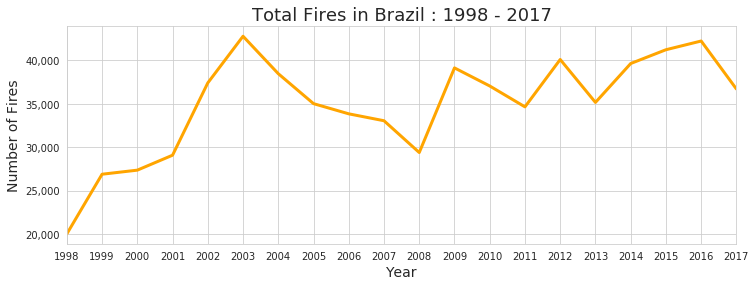

In [8]:
sns.set_style('whitegrid')
from matplotlib.pyplot import MaxNLocator, FuncFormatter
plt.figure(figsize=(12,4))
ax = sns.lineplot(x = 'year', y = 'number', data = year_mo_state, estimator = 'sum', color = 'orange', lw = 3, err_style = None)
plt.title('Total Fires in Brazil : 1998 - 2017', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Number of Fires', fontsize = 14)
ax.xaxis.set_major_locator(plt.MaxNLocator(19))
ax.set_xlim(1998, 2017)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

In [21]:
#Most number of fires area
dataset.groupby(by = 'state')['number'].sum().sort_values(ascending = False).head(10)

state
Mato Grosso     96246.028
Paraiba         52435.918
Sao Paulo       51121.198
Rio             45160.865
Bahia           44746.226
Piau            37803.747
Goias           37695.520
Minas Gerais    37475.258
Tocantins       33707.885
Amazonas        30650.129
Name: number, dtype: float64

In [22]:
state_series = dataset.groupby('state').size()
print(state_series)

state
Acre                239
Alagoas             240
Amapa               239
Amazonas            239
Bahia               239
Ceara               239
Distrito Federal    239
Espirito Santo      239
Goias               239
Maranhao            239
Mato Grosso         478
Minas Gerais        239
Paraiba             478
Pará                239
Pernambuco          239
Piau                239
Rio                 717
Rondonia            239
Roraima             239
Santa Catarina      239
Sao Paulo           239
Sergipe             239
Tocantins           239
dtype: int64


In [24]:
#checking the null values
dataset.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [26]:
# convert last column date to datetime type
dataset['date']= pd.to_datetime(dataset['date'])

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
year      6454 non-null int64
state     6454 non-null object
month     6454 non-null object
number    6454 non-null float64
date      6454 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [34]:
# convert all month names from latin to english
latin_months= dataset['month'].unique().tolist()
eng_month= ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_dict= dict(zip(latin_months, eng_month))
dataset.replace(month_dict, inplace=True)

In [35]:
dataset.head(20)

,year,state,month,number,date
0,1998,Acre,Jan,0.0,1998-01-01
1,1999,Acre,Jan,0.0,1999-01-01
2,2000,Acre,Jan,0.0,2000-01-01
3,2001,Acre,Jan,0.0,2001-01-01
4,2002,Acre,Jan,0.0,2002-01-01
5,2003,Acre,Jan,10.0,2003-01-01
6,2004,Acre,Jan,0.0,2004-01-01
7,2005,Acre,Jan,12.0,2005-01-01
8,2006,Acre,Jan,4.0,2006-01-01
9,2007,Acre,Jan,0.0,2007-01-01


In [36]:
dataset['year']= dataset['year'].astype('str') # converting year values from int to string
dataset.dtypes

year              object
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

Text(0.5, 1.0, 'Average Yearly Comparison')

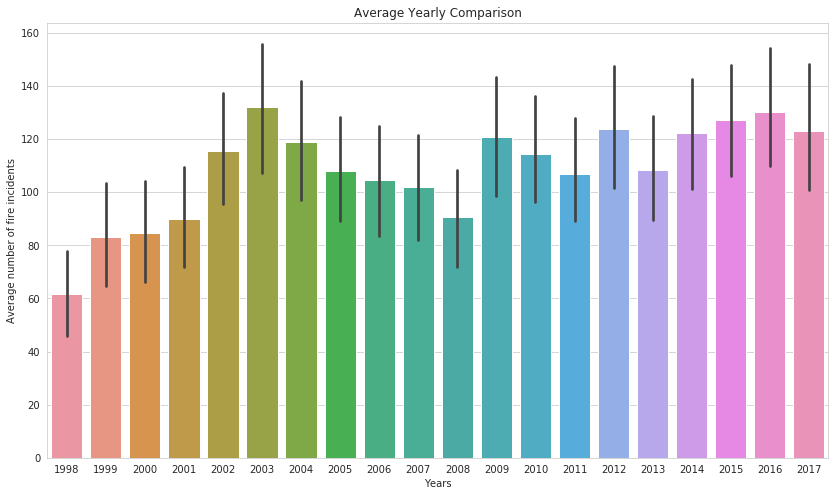

In [37]:
plt.figure(figsize=(14,8))
sns.barplot(dataset['year'],dataset['number'])
plt.xlabel('Years')
plt.ylabel('Average number of fire incidents')
plt.title('Average Yearly Comparison')

In [40]:
Yearly_Sum=dataset[['year','number']].groupby('year', as_index=False).sum()
Yearly_Avg=dataset[['year','number']].groupby('year', as_index=False).mean()

In [ ]:
#When you use as_index=False , you indicate 
#to groupby() that you don't want to set the column ID as the index (duh!).

Text(0.5, 1.0, 'Average Yearly Comparison')

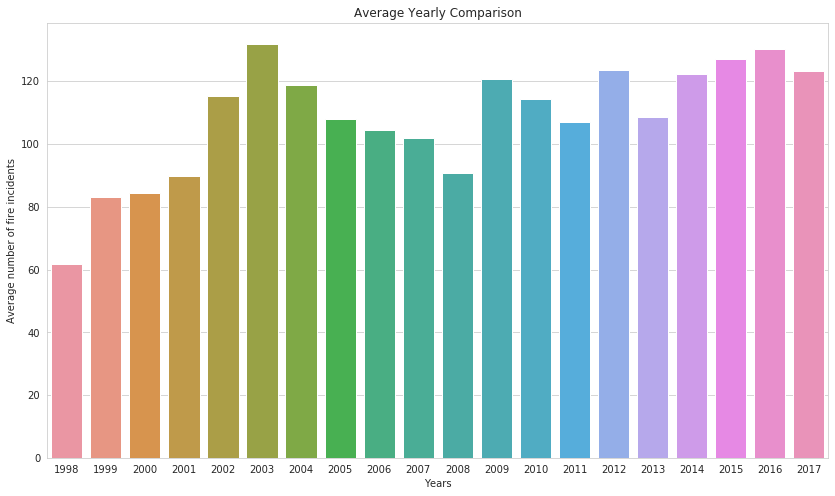

In [41]:
plt.figure(figsize=(14,8))
sns.barplot(Yearly_Avg['year'],Yearly_Avg['number'])
plt.xlabel('Years')
plt.ylabel('Average number of fire incidents')
plt.title('Average Yearly Comparison')

Text(0.5, 1.0, 'Total Yearly Comparison')

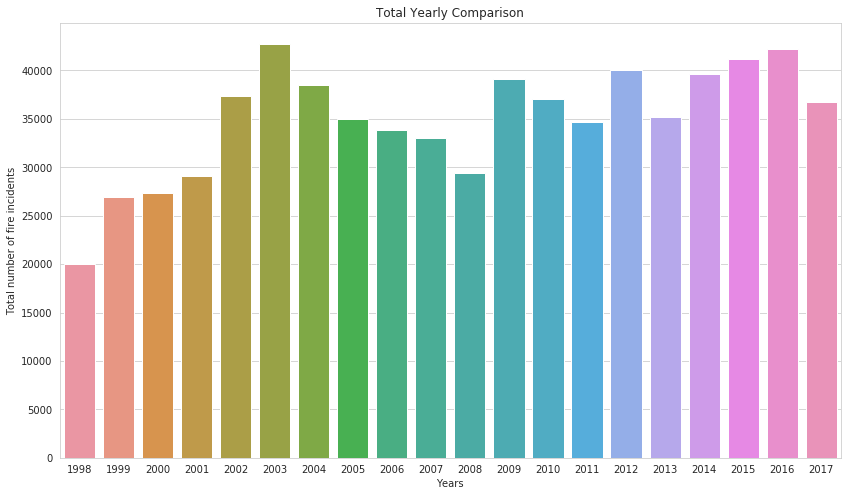

In [42]:
plt.figure(figsize=(14,8))
sns.barplot(Yearly_Sum['year'],Yearly_Sum['number'])
plt.xlabel('Years')
plt.ylabel('Total number of fire incidents')
plt.title('Total Yearly Comparison')

In [46]:
dataset['month'] = pd.Categorical(dataset['month'], categories=dataset.month.unique(), ordered=True)
dataset.sort_values('month')

,year,state,month,number,date
0,1998,Acre,Jan,0.0,1998-01-01
480,1999,Amapa,Jan,0.0,1999-01-01
481,2000,Amapa,Jan,2.0,2000-01-01
482,2001,Amapa,Jan,0.0,2001-01-01
483,2002,Amapa,Jan,7.0,2002-01-01
...,...,...,...,...,...
4050,2003,Pernambuco,Dec,229.0,2003-01-01
4051,2004,Pernambuco,Dec,373.0,2004-01-01
4052,2005,Pernambuco,Dec,191.0,2005-01-01
1192,2013,Bahia,Dec,131.0,2013-01-01


In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
year      6454 non-null object
state     6454 non-null object
month     6454 non-null category
number    6454 non-null float64
date      6454 non-null datetime64[ns]
dtypes: category(1), datetime64[ns](1), float64(1), object(2)
memory usage: 208.5+ KB
